## K Means Clustering

### 1

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
data=pd.read_csv(r'D:\Analytics\downloaded\PYTHON CLASS\income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [96]:
# Scaling data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['Age']=scaler.fit_transform(data[['Age']])
data['Income($)']=scaler.fit_transform(data[['Income($)']])
#data[['Age','Income($)]]=scaler.fit_tranform([['Age','Income($)]])
data.head()

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417


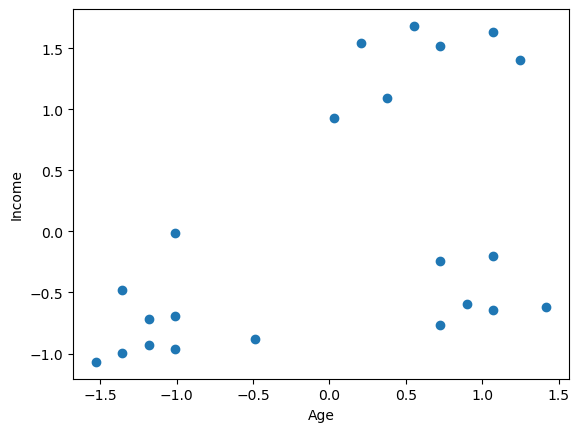

In [97]:
plt.scatter(data['Age'],data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()
d=data[['Age','Income($)']]

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

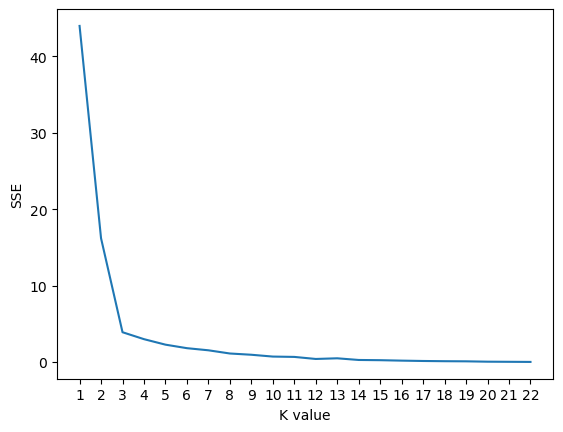

In [98]:
#### Elbow Method(To find the value of k)

from sklearn.cluster import KMeans
sse=[]
for k in range(1,23):
    km=KMeans(n_clusters=k)
    km.fit(d[['Age','Income($)']])
    sse.append(km.inertia_)

plt.xlabel('K value')
plt.ylabel('SSE')
plt.xticks(range(1,23))
plt.plot(range(1,23),sse)
plt.show()

In [99]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
ypred=km.fit_predict(d)
ypred

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [100]:
d['Cluster']=ypred
d

,Age,Income($),Cluster
0,-1.356055,-0.480684,0
1,-1.009157,-0.010159,0
2,-1.009157,-0.692421,0
3,-1.182606,-0.715947,0
4,1.245679,1.401417,2
5,0.725332,1.519048,2
6,1.072230,1.636679,2
7,0.551883,1.683732,2
8,0.204985,1.542574,2
9,0.031536,0.930891,2


In [101]:
#centroid

cnt=km.cluster_centers_
cnt

array([[-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261],
       [ 0.60143983,  1.40141653]])

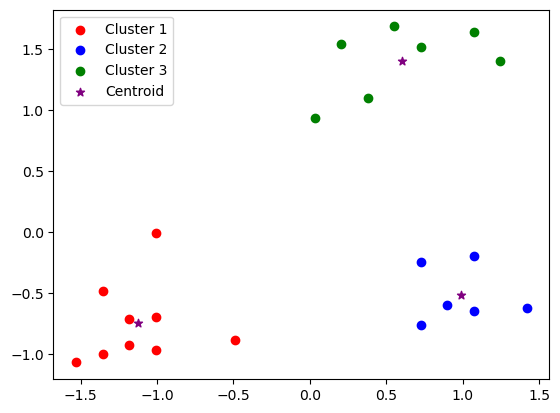

In [102]:
d1=d[d['Cluster']==0]
d2=d[d['Cluster']==1]
d3=d[d['Cluster']==2]
plt.scatter(d1['Age'],d1['Income($)'],color='red',label='Cluster 1')
plt.scatter(d2['Age'],d2['Income($)'],color='blue',label='Cluster 2')
plt.scatter(d3['Age'],d3['Income($)'],color='green',label='Cluster 3')
plt.scatter(cnt[:,0],cnt[:,1],marker='*',label='Centroid',color='purple')
plt.legend()
plt.show()

## Hierarchical Clustering

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
dt=pd.read_csv(r'D:\Analytics\downloaded\PYTHON CLASS\income.csv')
dt.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [141]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
dt[['Age','Income($)']]=scaler.fit_transform(dt[['Age','Income($)']])
dt.head(10)

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417
5,Gautam,0.725332,1.519048
6,David,1.072230,1.636679
7,Andrea,0.551883,1.683732
8,Brad,0.204985,1.542574
9,Angelina,0.031536,0.930891


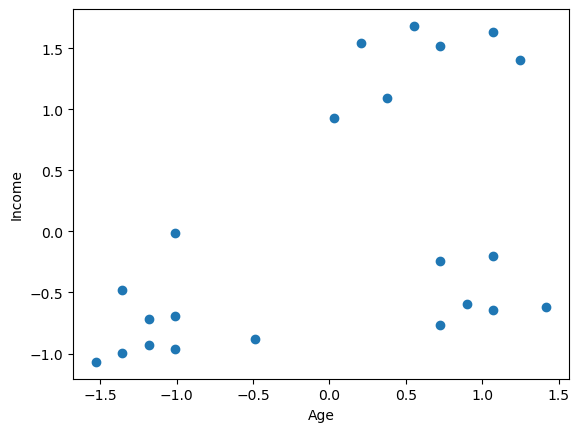

In [160]:
plt.scatter(dt['Age'],dt['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show
x=dt[['Age','Income($)']]

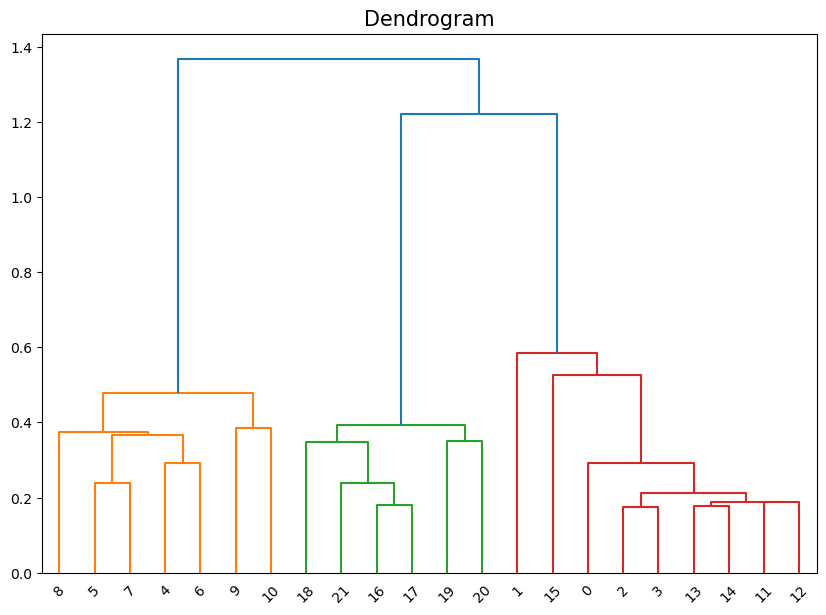

In [180]:
# Plotting Dengogram

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(x,method='single')) ## method - complete,average,ward,single
plt.title("Dendrogram",fontsize=15)
plt.show()

In [188]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,linkage='single',metric='euclidean')
cl=cluster.fit_predict(x)
cl

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [194]:
x['Cluster']=cl
x

,Age,Income($),Cluster
0,-1.356055,-0.480684,0
1,-1.009157,-0.010159,0
2,-1.009157,-0.692421,0
3,-1.182606,-0.715947,0
4,1.245679,1.401417,1
5,0.725332,1.519048,1
6,1.072230,1.636679,1
7,0.551883,1.683732,1
8,0.204985,1.542574,1
9,0.031536,0.930891,1


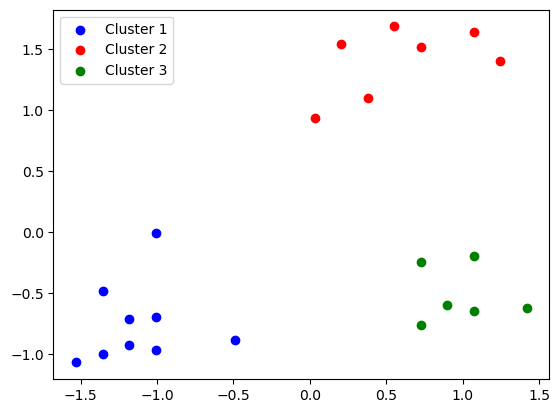

In [202]:
x1=x[x['Cluster']==0]
x2=x[x['Cluster']==1]
x3=x[x['Cluster']==2]
plt.scatter(x1['Age'],x1['Income($)'],color='blue',label='Cluster 1')
plt.scatter(x2['Age'],x2['Income($)'],color='red',label='Cluster 2')
plt.scatter(x3['Age'],x3['Income($)'],color='green',label='Cluster 3')
plt.legend()
plt.show()